In [1]:
from utils.imports import *

Using TensorFlow backend.


In [2]:
model_paths = PATH['model_paths']
data_path = PATH['model_train']

In [3]:
model_fenge_path=model_paths + 'final_fenge_170807.h5'
model_fenge = load_model(model_fenge_path, custom_objects={'dice_coef_loss': dice_coef_loss, 'dice_coef': dice_coef})

In [4]:
lungs = [x for x in sorted(os.listdir(data_path + 'lung/')) if x != '.DS_Store']
nods = [x for x in sorted(os.listdir(data_path + 'nodule/')) if x != '.DS_Store']
lung_100 = sorted(np.random.choice(lungs,101))

### 模型预测结果与GroundTruth的相似度应越高越好，满值为1
#### -肺部掩模：加在预测前后都明显降低准确率
#### -预测结果门限：0.95，在实际检测中，不加门限的查出的ROI数量更少
#### -开运算：5和3没太大差别，3与不加open稍好0.01%，总0.11%

- 06072;28.292984%
- 06073;28.292829%
- 06082;28.292829%
- 06083;28.292829%

In [5]:
#simule(data_path,model_fenge,lung_100)

In [6]:
for scan in tqdm(lung_100):
        patient_id = scan.split('/')[-1][:-4]
        img = cv2.imread(data_path + 'lung/' + scan,cv2.IMREAD_GRAYSCALE)   
        #seg_img, overlap = helpers.get_segmented_lungs(img.copy()*255)
        mask = cv2.imread(data_path + 'nodule/' + scan[:-5] + 'm.png',cv2.IMREAD_GRAYSCALE).astype(int) 
        
        
        #img = skimage.morphology.binary_opening(np.squeeze(img), np.ones([2,2])) 
        img = np.expand_dims(img,0)
        img = np.expand_dims(img,0)   
        p = model_fenge.predict(img)

        p = np.squeeze(p)
        if np.max(p)<1:
            print patient_id
        
        #overlap = skimage.morphology.binary_opening(np.squeeze(overlap), np.ones([5,5]))
        #p=p*overlap

100%|██████████| 101/101 [00:14<00:00,  8.15it/s]


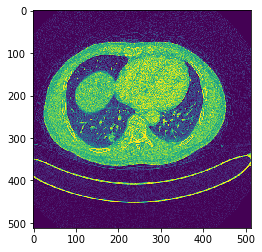

In [7]:
%matplotlib inline
plt.imshow(np.squeeze(img))

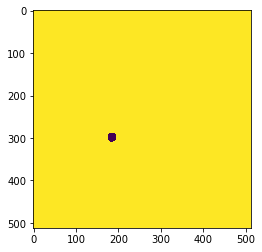

In [8]:
plt.imshow(np.squeeze(mask))

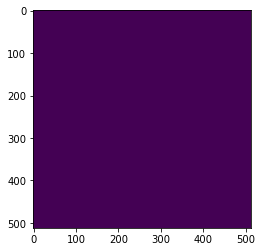

In [9]:
plt.imshow(np.squeeze(p))

([array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  512.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  512.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  512.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  512.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  512.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  512.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  512.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  512.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  512.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  512.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  512.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  512.]),
  array([   0.,    0.,    0.

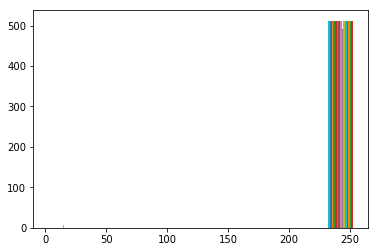

In [15]:
plt.hist(np.squeeze(mask).tolist())

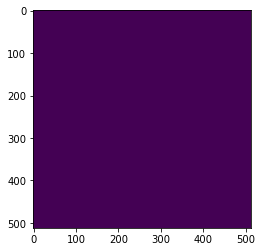

In [11]:
s=p.copy()
s[s==1]=int(1)
s[s!=1]=int(0)
s=np.squeeze(s)
s = skimage.morphology.binary_opening(s, np.ones([3,3]))
plt.imshow(s)

In [12]:
mean=0.0

mean += dice_coef_np(mask,s)

In [13]:
mean

1.9921773194051982

In [14]:
plt.imshow(np.squeeze(overlap*255))

NameError: name 'overlap' is not defined